In [32]:
import numpy as np


## Prepare the data for the calculations

In [33]:
# Define the start and end values, as well as the increment
start_value = 0.01
end_value = 1000
increment = 0.01

In [34]:
# Create an array of data points
data_points = np.arange(start_value, end_value + increment, increment)

In [35]:
# Print the first few data points as an example
print(data_points[:10])  # This will print the first 10 data points
print(len(data_points))


[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
100000


### (a) Compute σ2 of the population D. Let’s call σ2 the true variance of the population D.

In [36]:
meanofallpoints = sum(data_points)/len(data_points)
print(meanofallpoints)

500.005


In [37]:
def calculate_variance(data_points):
    # Calculate the mean (average) of the data points
    mean = sum(data_points) / len(data_points)

    # Calculate the squared differences from the mean
    squared_diff = [(x - mean) ** 2 for x in data_points]

    # Calculate the variance as the average of the squared differences
    variance = sum(squared_diff) / len(data_points)

    return variance


In [38]:

true_variance = calculate_variance(data_points)
print("Variance:", true_variance)


Variance: 83333.333325


True variance of population : 83333.333325

#### Random generator

In [39]:
import time

class SimpleRandom:
    def __init__(self, seed=None):
        if seed is None:
            seed = int(time.time() * 1000000) % 1000000
        self.state = seed

    def rand(self):
        a = 1664525
        c = 1013904223
        m = 2**32
        self.state = (a * self.state + c) % m
        return self.state
    def randrange(self, start, stop):

        range_size = stop - start
        rand_num = self.rand() % range_size
        return start + rand_num

    

In [40]:
random_generator = SimpleRandom()
print(random_generator)

#### Use sampling with replacement, to randomly sample 50 points {y1, . . . , y50} from the population D, i.e., for 1 ≤ i ≤ 50, yi ∈ D. Compute s1, s2 and s3 defined as

### Choosing random 50 points

In [41]:
# Number of iterations
num_iterations = 10  # You can change this to the desired number of iterations

In [42]:
fiftypoints= []
totalpoints = 100000

In [43]:
# Choose 50 unique indexes without repetition
while len(fiftypoints) < 50 :
    index = random_generator.rand() % totalpoints
    # if index not in fiftyindex:
    fiftypoints.append(data_points[index])


In [44]:
print(fiftypoints)

[208.43, 850.58, 688.45, 473.88, 983.67, 934.14, 183.37, 820.8, 346.11, 840.74, 942.9300000000001, 321.0, 490.63, 403.02, 661.85, 102.16000000000001, 71.63000000000001, 973.62, 120.61000000000001, 800.76, 578.07, 601.18, 36.97, 627.36, 226.26999999999998, 786.5, 270.45, 467.08, 794.79, 813.1, 550.97, 303.6, 722.03, 888.66, 321.09, 786.52, 557.43, 330.62, 296.96999999999997, 953.6, 671.87, 812.26, 538.77, 688.68, 770.95, 701.26, 126.17, 952.08, 588.43, 110.9]


In [45]:
meanoffiftypoints = sum(fiftypoints) /50
print( meanoffiftypoints)

561.8602


In [46]:
numerators = [ (x - meanoffiftypoints) ** 2 for x in fiftypoints]

In [47]:
print(numerators)

[124912.90627203997, 83359.12291204004, 16024.977464040021, 7740.515592039995, 177923.50737603998, 138592.24948804002, 143254.83149603996, 67049.82002403999, 46548.14880003998, 77773.94284804002, 145214.19247204007, 58013.63594403998, 5073.741392039996, 25230.209136039994, 9997.960104040012, 211324.27388003995, 240325.64899203996, 169546.13289604004, 194701.73900003996, 57073.114440040015, 262.7576160400028, 1546.0466720399988, 275509.72205603996, 4290.223800040007, 112620.78233603999, 50463.03974404002, 84919.90466403999, 8983.286312039996, 54256.29172804, 63121.43710404003, 118.59645603999861, 66698.33090403998, 25654.364832040003, 106798.10928004001, 57970.28920804, 50472.02573604001, 19.62667204000012, 53472.03009603998, 70166.81805603999, 153460.07090404004, 12102.15609604001, 62700.05984004001, 533.1573360399991, 16083.261672039996, 43718.54446404003, 19432.304240040008, 189825.95037603995, 152271.49231204006, 705.9542720399993, 203365.10198404]


In [48]:
numerator_after_addsquare_mean = sum(numerators)

In [49]:
print(numerator_after_addsquare_mean)

3941222.407298


In [50]:
s1square = numerator_after_addsquare_mean/51
print("s1square is " , s1square)

s1square is  77278.87073133333


In [51]:
s2square = numerator_after_addsquare_mean/50
print("s2square is " , s2square)

s2square is  78824.44814596


In [52]:
s3square = numerator_after_addsquare_mean/ 49
print("s3square is " , s3square)

s3square is  80433.11035302041


-----------------------------------------------------------------------------------------------------------------------------

##  Repeat (b) for multiple iterations and maintain the average scores, i.e., Avgs2 1 , Avgs2 2 & Avgs2 3 .

In [53]:
import matplotlib.pyplot as plt

In [54]:
# Initialize average scores
avg_s1_squared = 0
avg_s2_squared = 0
avg_s3_squared = 0

In [55]:
# Number of iterations
num_iterations = 100  # You can change this to the desired number of iterations

In [56]:
list_of_average_s1_2 , list_of_average_s2_2 , list_of_average_s3_2 = [],[],[]

In [57]:
iterations = []

In [58]:
# Perform multiple iterations
# plotting every 20 , 5 times
iteration_count = 0
for iteration in range(num_iterations):
    avg_s1_squared = 0 
    avg_s2_squared = 0 
    avg_s3_squared = 0
    for t in range (100):
        # Perform sampling with replacement to randomly select 50 points from the population
        fiftypoints= []
        totalpoints = 100000
        sample_size = 50
        # Choose 50 unique indexes without repetition
        while len(fiftypoints) < 50 :
            index = random_generator.rand() % totalpoints
            # if index not in fiftyindex:
            fiftypoints.append(data_points[index])

        meanoffiftypoints = sum(fiftypoints) /50
        numerators = [ (x - meanoffiftypoints) ** 2 for x in fiftypoints]
        numerator_after_addsquare_mean = sum(numerators)
        
        # Calculate s^2_1, s^2_2, and s^2_3 for the current iteration
        s1_squared = numerator_after_addsquare_mean/51 # Sample variance with population correction
        s2_squared = numerator_after_addsquare_mean/50  # Sample variance with Bessel's correction
        s3_squared = numerator_after_addsquare_mean/49  # Sample variance with another degree of freedom
        avg_s1_squared += (s1_squared)
        avg_s2_squared += (s2_squared)
        avg_s3_squared += (s3_squared)
    
    iteration_count += 1
    iterations.append(iteration_count)
        
    avg_s1_squared = avg_s1_squared / 100
    avg_s2_squared = avg_s2_squared / 100
    avg_s3_squared = avg_s3_squared / 100
    list_of_average_s1_2.append(avg_s1_squared)
    list_of_average_s2_2.append(avg_s2_squared)
    list_of_average_s3_2.append(avg_s3_squared)
    
    



In [59]:
print(iterations)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [60]:
# Print the average scores after multiple iterations
print("Average s^2_1:", list_of_average_s1_2)
print("Average s^2_2:", list_of_average_s2_2)
print("Average s^2_3:", list_of_average_s3_2)


Average s^2_1: [82455.0667701976, 79528.93884519064, 80033.68554895217, 80583.61485625885, 80018.26647153102, 79359.35690079536, 80827.7450420471, 80218.62399478117, 81568.66013078747, 80316.85937965331, 78310.40428258038, 80279.22769209881, 79057.68806156708, 80667.79177261332, 78842.24448800787, 78884.52451260397, 80580.95473935214, 80081.83547111056, 80976.02225217411, 79726.67787587922, 81192.82495417881, 80430.72353992941, 79467.86453531765, 80202.1322084157, 78215.49463690195, 79491.43522866354, 80366.7162986431, 79914.76842890197, 79465.55894929728, 80368.32140717335, 79841.66789511686, 80613.50104234822, 79389.93535463061, 80766.34784650197, 80073.98381688628, 79097.17074462274, 83637.5244414761, 79924.05010946663, 79906.64574853172, 81665.33229299613, 79677.60237854274, 80915.79641504784, 80129.1266942259, 78867.2443478604, 80589.89393553726, 80814.75564308233, 79147.17872123136, 80332.61212667139, 80019.04921248784, 80825.77101179137, 80101.44324063532, 80689.79637958437, 807

### (d) Use three different scatter plots to visualize the change in Avgs2 i , for 1 ≤ i ≤ 3 over increasing number of iterations and compare it with σ2 the true variance of D.

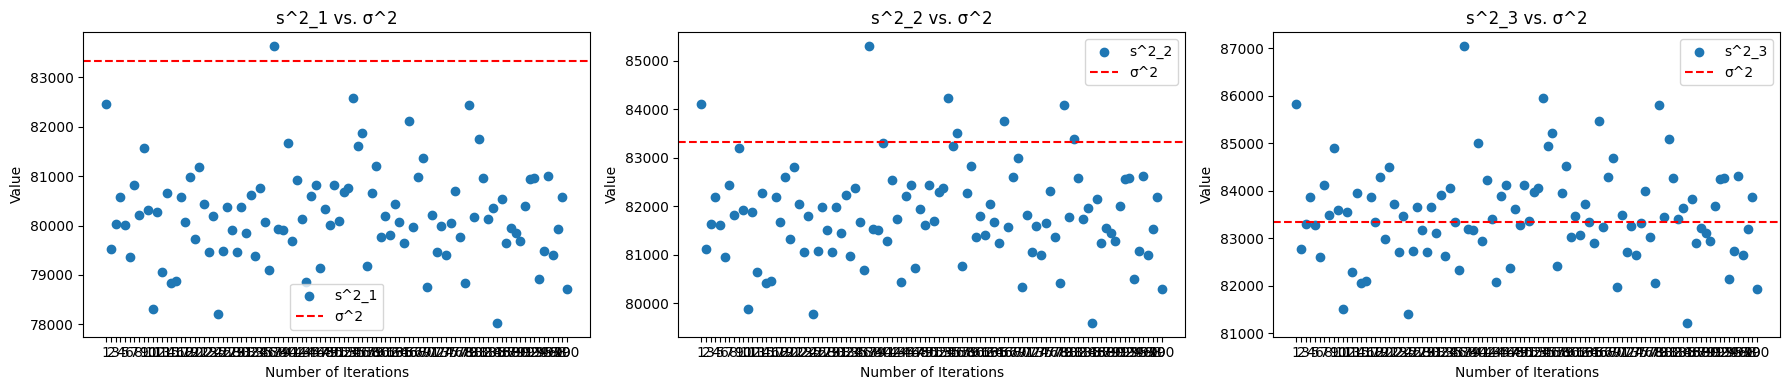

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 4))

# Scatter plot for s^2_1
plt.subplot(131)
plt.scatter(iterations, list_of_average_s1_2, label='s^2_1', marker='o')
plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')

# plt.plot(iterations, true_variance, label='σ^2', linestyle='--', color='red')
plt.xlabel('Number of Iterations')
plt.ylabel('Value')
plt.xticks(iterations)
plt.title('s^2_1 vs. σ^2')
plt.legend()

plt.subplot(132)
plt.scatter(iterations, list_of_average_s2_2, label='s^2_2', marker='o')
plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
plt.xlabel('Number of Iterations')
plt.ylabel('Value')
plt.xticks(iterations)

plt.title('s^2_2 vs. σ^2')
plt.legend()

plt.subplot(133)
plt.scatter(iterations, list_of_average_s3_2, label='s^2_3', marker='o')
plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
plt.xlabel('Number of Iterations')
plt.ylabel('Value')
plt.xticks(iterations)

plt.title('s^2_3 vs. σ^2')
plt.legend()

plt.tight_layout()
plt.show()


## part e Repeat (b), (c) & (d) multiple times and notice among Avgs2 1, Avgs2 2 and Avgs2 3 which score approaches to the true variance much quickly or frequently. Argue its reason.

# Repeating the same experiment 10 times and writing observation

Average s^2_1: [80786.78746036864, 78590.43450438432, 82193.54451611763, 86245.54363831374, 81775.06578093334, 73728.11374454117, 78419.12068088629, 83315.5565846353, 80123.94909751373, 80278.84242319215]
Average s^2_2: [82402.523209576, 80162.24319447202, 83837.41540643998, 87970.45451108002, 83410.56709655203, 75202.67601943201, 79987.50309450402, 84981.86771632802, 81726.42807946402, 81884.41927165602]
Average s^2_3: [84084.2073567102, 81798.20734129797, 85548.38306779592, 89765.76990926532, 85112.8235679102, 76737.4245096245, 81619.90111684083, 86716.19154727347, 83394.31436680003, 83555.52986903673]


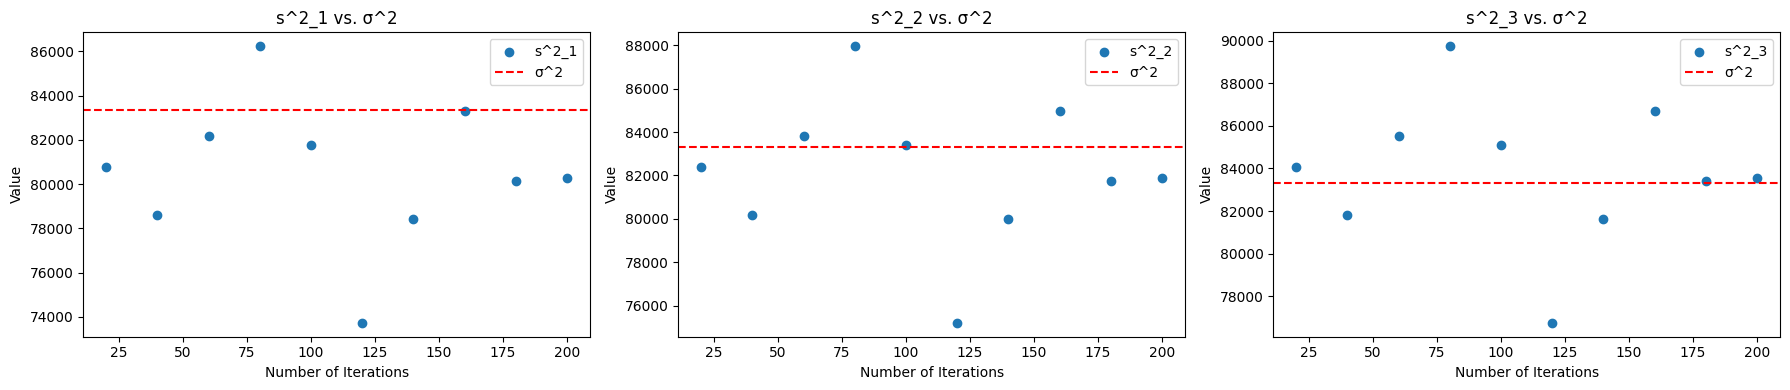

Average s^2_1: [80636.62714676863, 83479.26014604705, 80539.55442658039, 76531.51226300393, 76188.11223790588, 80037.35074720785, 77524.41910234511, 77998.45923787451, 78256.26650363136, 81933.40222742745]
Average s^2_2: [82249.359689704, 85148.845348968, 82150.345515112, 78062.14250826399, 77711.87448266402, 81638.097762152, 79074.90748439201, 79558.42842263199, 79821.39183370401, 83572.07027197599]
Average s^2_3: [83927.91805071839, 86886.57688670204, 83826.8831786857, 79655.24745741226, 79297.83110475919, 83304.18138995103, 80688.68110652245, 81182.06981901223, 81450.39983031023, 85277.62272650612]


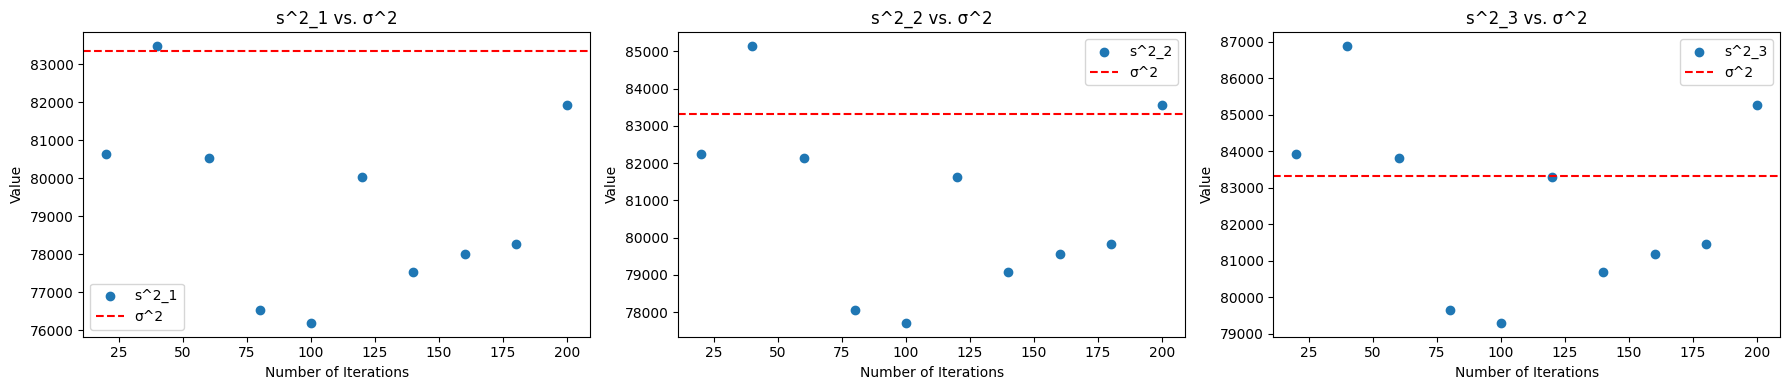

Average s^2_1: [79688.16209390588, 79088.79694466667, 82790.69484245489, 81755.63068571764, 78262.0906079137, 77233.74023978823, 77960.12656712941, 82087.23398472942, 78109.79299298038, 75181.17218256471]
Average s^2_2: [81281.92533578399, 80670.57288356, 84446.508739304, 83390.743299432, 79827.33242007201, 78778.415044584, 79519.329098472, 83728.97866442401, 79671.98885284, 76684.795626216]
Average s^2_3: [82940.74013855509, 82316.91110567345, 86169.90687684082, 85092.59520350206, 81456.4616531347, 80386.13780059593, 81142.17254946122, 85437.7333310449, 81297.9478090204, 78249.79145532244]


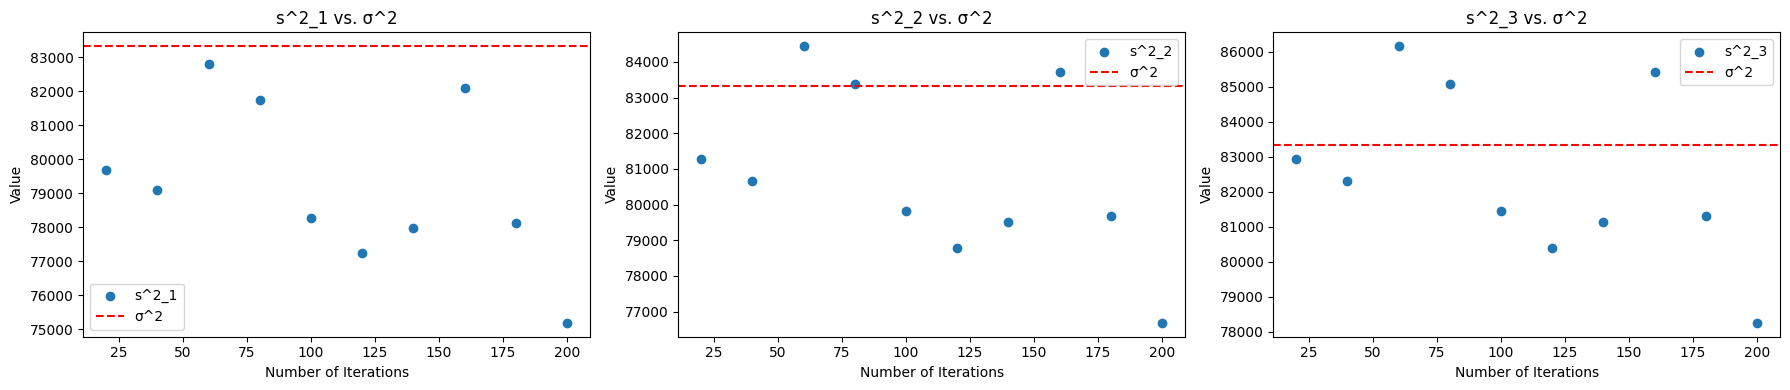

Average s^2_1: [79959.13597199216, 82764.54530520001, 80112.00993239999, 81511.28402683136, 74231.76760844706, 78345.50673315293, 78676.22652847842, 78778.8026133098, 82488.24498080784, 78996.6117550196]
Average s^2_2: [81558.318691432, 84419.83621130402, 81714.250131048, 83141.50970736801, 75716.402960616, 79912.41686781599, 80249.751059048, 80354.378665576, 84138.00988042398, 80576.54399012]
Average s^2_3: [83222.77417493062, 86142.6900115347, 83381.88788882448, 84838.27521159999, 77261.63567409795, 81543.28251817959, 81887.50108066123, 81994.26394446532, 85855.11212288163, 82220.96325522449]


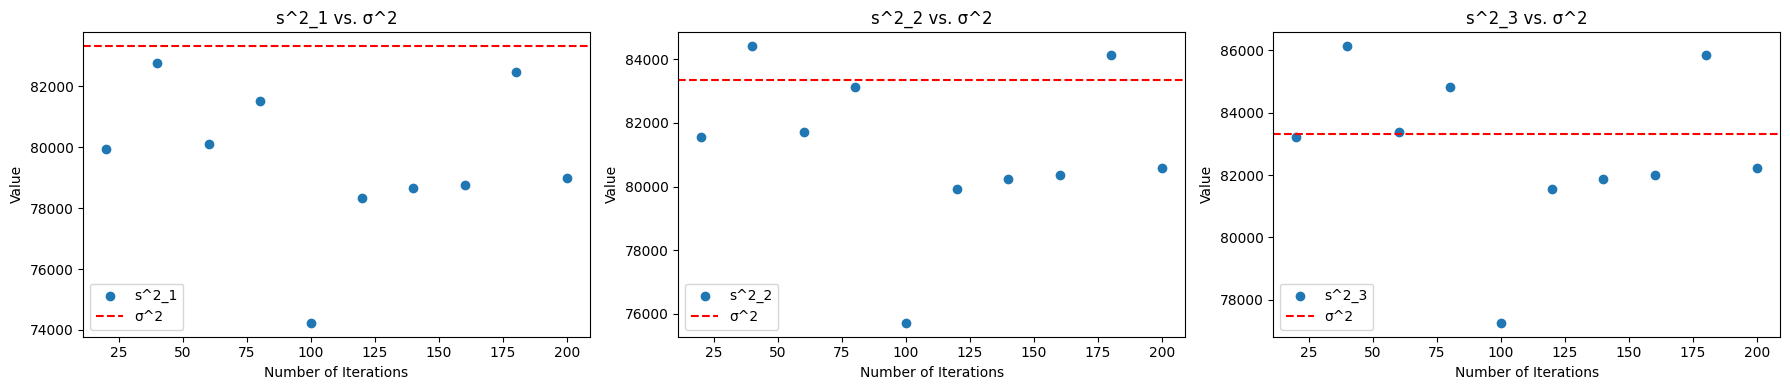

Average s^2_1: [84084.02381901963, 78200.94498971765, 81965.23989845489, 78284.90598196862, 83946.50938978039, 81452.33782146666, 80281.889356651, 83374.71236941959, 79382.35222861961, 75638.11247031372]
Average s^2_2: [85765.7042954, 79764.96388951199, 83604.54469642401, 79850.60410160801, 85625.439577576, 83081.384577896, 81887.52714378401, 85042.206616808, 80969.999273192, 77150.87471972001]
Average s^2_3: [87516.0247912245, 81392.8202954204, 85310.75989431022, 81480.20826694694, 87372.89752813878, 84776.92303866938, 83558.70116712652, 86777.76185388569, 82622.44823795102, 78725.3823670612]


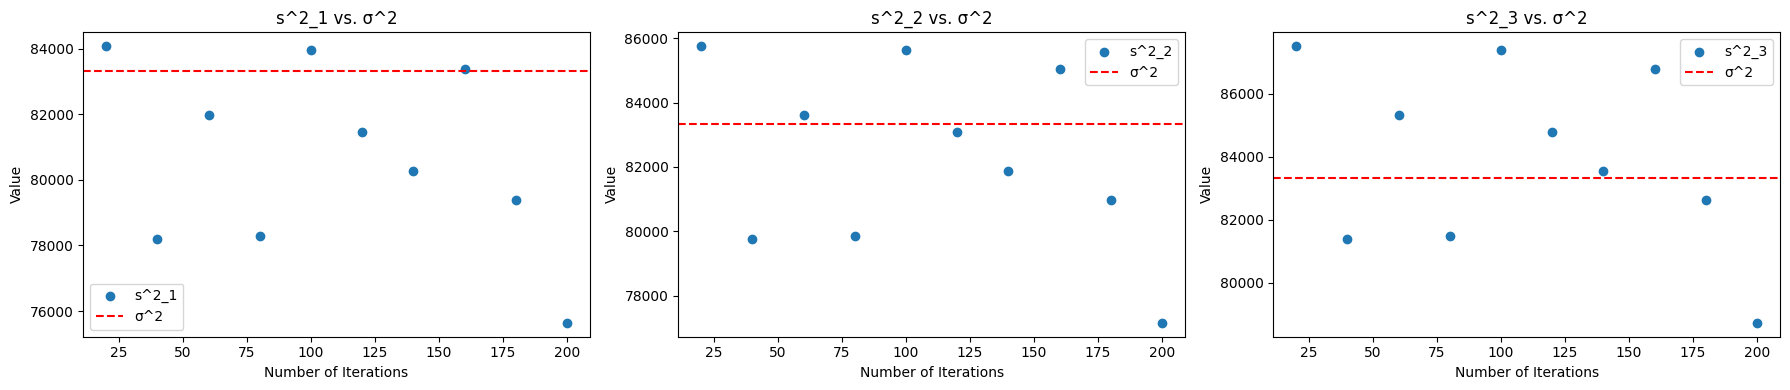

Average s^2_1: [81160.66168857257, 79097.67957669804, 77808.1754185804, 82258.25872574902, 75363.31190322354, 80943.54571492551, 80481.71914526273, 78294.72891906666, 77196.46796421177, 80640.4820834902]
Average s^2_2: [82783.87492234402, 80679.63316823202, 79364.338926952, 83903.423900264, 76870.578141288, 82562.41662922401, 82091.35352816798, 79860.62349744802, 78740.39732349603, 82253.29172516]
Average s^2_3: [84473.34175749391, 82326.15629411428, 80984.01931321635, 85615.73867373879, 78439.36545029387, 84247.36390737144, 83766.68727364083, 81490.43214025308, 80347.344207649, 83931.93033179591]


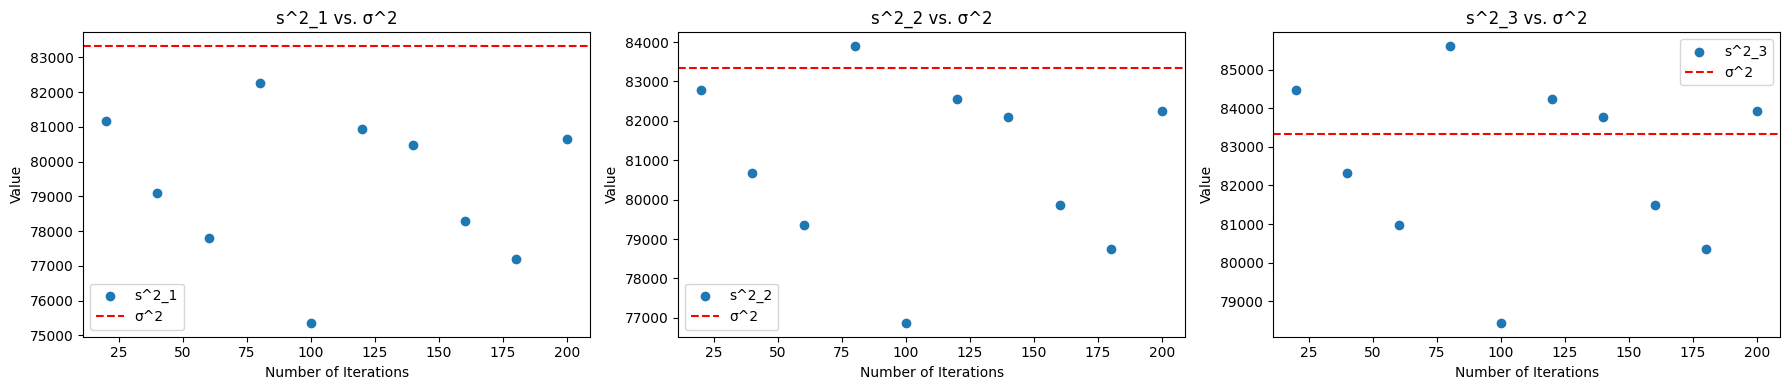

Average s^2_1: [82633.74944926273, 81780.21852007057, 80506.40340364705, 83385.23438265882, 84138.86381249412, 80277.95261362352, 83353.29721848627, 83202.53748916861, 77994.14067084706, 77202.29868885492]
Average s^2_2: [84286.42443824798, 83415.82289047199, 82116.53147172, 85052.93907031199, 85821.64108874401, 81883.51166589602, 85020.363162856, 84866.588238952, 79554.023484264, 78746.34466263198]
Average s^2_3: [86006.55554923267, 85118.1866229306, 83792.37905277552, 86788.71333705306, 87573.1031517796, 83554.60374071021, 86755.47261515919, 86598.55942750204, 81177.57498394285, 80353.41292105308]


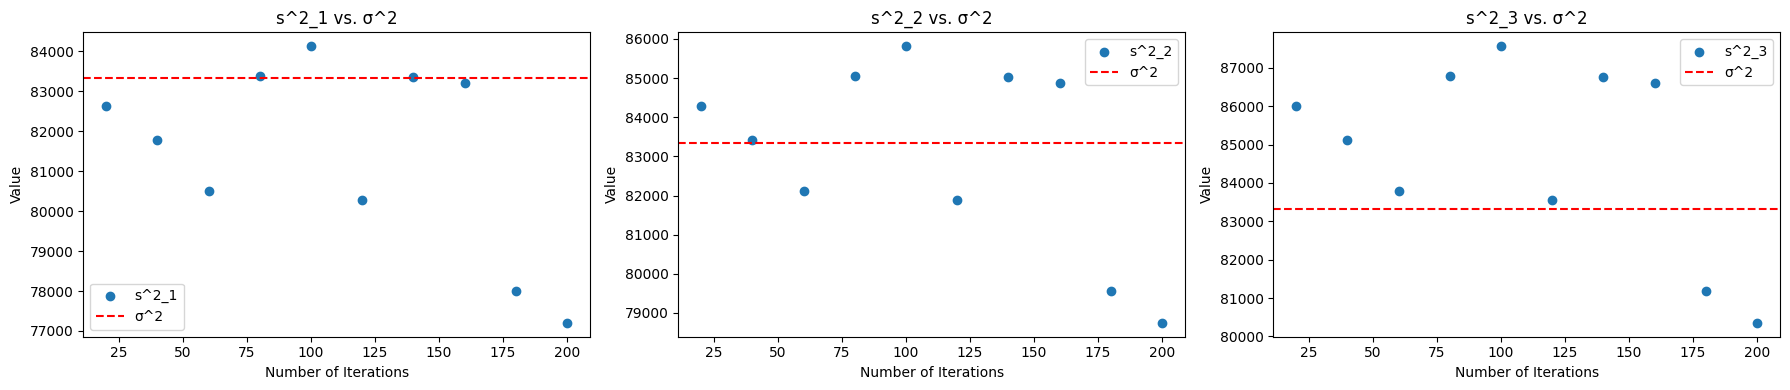

Average s^2_1: [79998.0343625804, 76617.16138990589, 82577.16435762352, 79487.2481928549, 80856.55926071372, 78909.09081622746, 81787.53473277649, 75381.45433434511, 82318.29644170197, 81449.37507047059]
Average s^2_2: [81597.99504983201, 78149.50461770399, 84228.707644776, 81076.99315671201, 82473.690445928, 80487.27263255199, 83423.28542743201, 76889.083421032, 83964.66237053601, 83078.36257188002]
Average s^2_3: [83263.26025493063, 79744.3924670449, 85947.66086201632, 82731.62567011428, 84156.82698564082, 82129.87003321634, 85125.80145656325, 78458.24838880818, 85678.22690871022, 84773.83935906124]


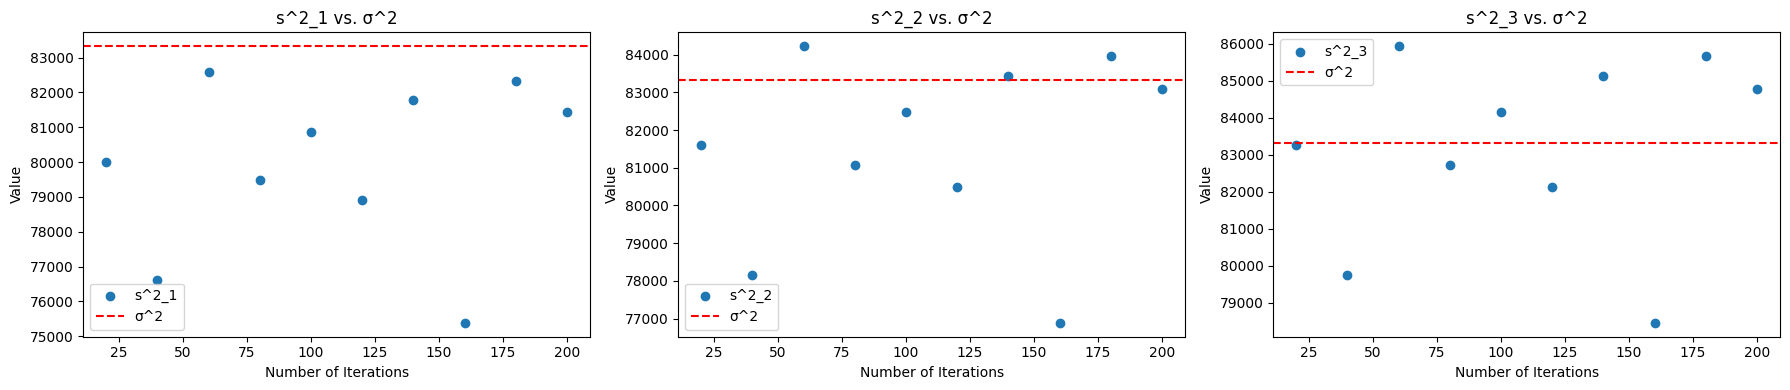

Average s^2_1: [81938.53037613335, 81172.03948044707, 83887.4108425804, 77243.18474827454, 81696.85465547451, 80475.73661826667, 79760.16702843139, 80932.34300948234, 80419.28291837647, 80333.44900690981]
Average s^2_2: [83577.30098365601, 82795.48027005601, 85565.15905943202, 78788.04844324001, 83330.79174858402, 82085.251350632, 81355.370369, 82550.98986967202, 82027.668576744, 81940.11798704798]
Average s^2_3: [85282.9601874041, 84485.18394903673, 87311.3867953388, 80395.96779922451, 85031.42015161632, 83760.4605618694, 83015.68405000001, 84235.70394864489, 83701.70262933061, 83612.36529290614]


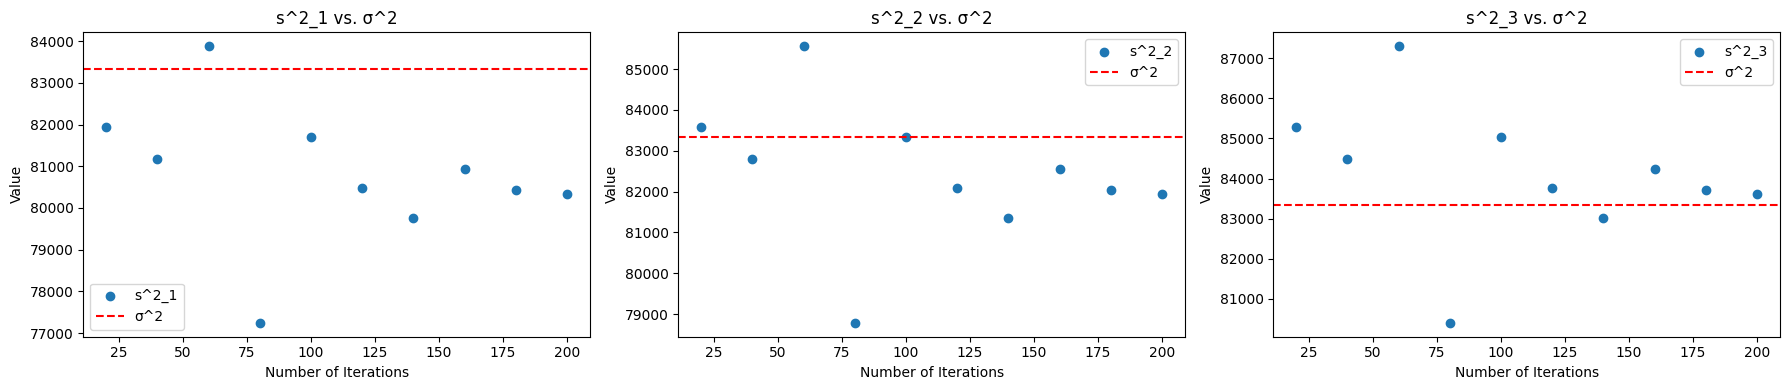

Average s^2_1: [78019.42629945882, 78626.31022943532, 80099.85665854902, 76689.05344085491, 79065.1426160706, 83663.37345854903, 80100.93915053335, 82907.82508659609, 78477.37062021176, 79826.80016951372]
Average s^2_2: [79579.814825448, 80198.83643402401, 81701.85379172002, 78222.834509672, 80646.445468392, 85336.64092772, 81702.95793354402, 84565.981588328, 80046.918032616, 81423.33617290402]
Average s^2_3: [81203.89267902859, 81835.54738165715, 83369.23856297959, 79819.21888742041, 82292.29129427756, 87078.20502828571, 83370.3652383102, 86291.81794727346, 81680.52860471021, 83085.03691112653]


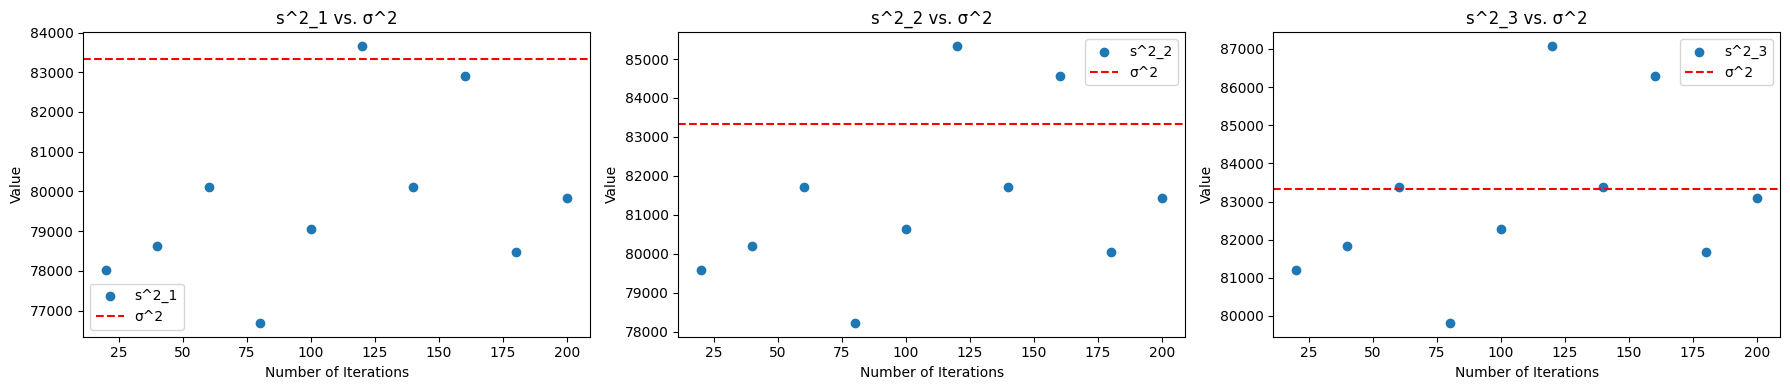

In [62]:
for x in range(10): 
   # Initialize average scores
    avg_s1_squared = 0
    avg_s2_squared = 0
    avg_s3_squared = 0
    # Number of iterations
    num_iterations = 10  # You can change this to the desired number of iterations
    list_of_average_s1_2 , list_of_average_s2_2 , list_of_average_s3_2 = [],[],[]
    iterations = []
    # Perform multiple iterations
    # plotting every 20 , 5 times
    iteration_count = 0
    for iteration in range(50):
        avg_s1_squared = 0 
        avg_s2_squared = 0 
        avg_s3_squared = 0
        for t in range (100):
            # Perform sampling with replacement to randomly select 50 points from the population
            fiftypoints= []
            totalpoints = 100000
            sample_size = 50
            # Choose 50 unique indexes without repetition
            while len(fiftypoints) < 50 :
                index = random_generator.rand() % totalpoints
                # if index not in fiftyindex:
                fiftypoints.append(data_points[index])

            meanoffiftypoints = sum(fiftypoints) /50
            numerators = [ (x - meanoffiftypoints) ** 2 for x in fiftypoints]
            numerator_after_addsquare_mean = sum(numerators)
            
            # Calculate s^2_1, s^2_2, and s^2_3 for the current iteration
            s1_squared = numerator_after_addsquare_mean/51 # Sample variance with population correction
            s2_squared = numerator_after_addsquare_mean/50  # Sample variance with Bessel's correction
            s3_squared = numerator_after_addsquare_mean/49  # Sample variance with another degree of freedom
            avg_s1_squared += (s1_squared)
            avg_s2_squared += (s2_squared)
            avg_s3_squared += (s3_squared)
        iteration_count += 1
        iterations.append(iteration_count)
            
        avg_s1_squared = avg_s1_squared / 100
        avg_s2_squared = avg_s2_squared / 100
        avg_s3_squared = avg_s3_squared / 100
        list_of_average_s1_2.append(avg_s1_squared)
        list_of_average_s2_2.append(avg_s2_squared)
        list_of_average_s3_2.append(avg_s3_squared)
        
        
    # Print the average scores after multiple iterations
    print("Average s^2_1:", list_of_average_s1_2)
    print("Average s^2_2:", list_of_average_s2_2)
    print("Average s^2_3:", list_of_average_s3_2)

    # import matplotlib.pyplot as plt

    plt.figure(figsize=(18, 4))

    # Scatter plot for s^2_1
    plt.subplot(131)
    plt.scatter(iterations, list_of_average_s1_2, label='s^2_1', marker='o')
    plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')

    # plt.plot(iterations, true_variance, label='σ^2', linestyle='--', color='red')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Value')
    plt.title('s^2_1 vs. σ^2')
    plt.legend()

    plt.subplot(132)
    plt.scatter(iterations, list_of_average_s2_2, label='s^2_2', marker='o')
    plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Value')
    plt.title('s^2_2 vs. σ^2')
    plt.legend()

    plt.subplot(133)
    plt.scatter(iterations, list_of_average_s3_2, label='s^2_3', marker='o')
    plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Value')
    plt.title('s^2_3 vs. σ^2')
    plt.legend()

    plt.tight_layout()
    plt.show()


## From the graphs, it's visible that s^2_3 , is reaching the true variance earliest.
## Degrees of freedom refer to the number of independent pieces of information available in a sample to estimate a parameter. In the context of variance estimates:


#### Since there is one less degree of freedom then n, because we have the sample variance is already defined
### However,  using (n - 1) degrees of freedom (as in s^2_3) should be done when estimating the population variance from a sample because it provides a less biased estimate of the true population variance. This correction accounts for the fact that you've already used one degree of freedom to calculate the sample mean.

#### (as in s^2_2) , assume n degrees of freedom , but since we have defined , sample variance it doesn't take account of it  , and hence, the value is although close but not as close as 3rd one and doesn't reach it as fast as 3rd

#### (as in s^2_1) , assume n+1 degrees of freedom , but since we have defined , sample variance it doesn't take account of it , and even after that it takes one more degree of freedom , and hence, the value is not even as close as second and reaches true_variance slower than 2nd one also , (even slower, and farther than 3rd)
 